In [1]:
from sklearn.datasets import *
import pandas as pd
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
sy = pd.Series(iris.target,dtype='category')
sy= sy.cat.rename_categories(iris.target_names)
data['Y']=sy
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
w_data=load_wine()
#w_data.data
#w_data.feature_names
w_data.target
w_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
data = pd.DataFrame(w_data.data,columns=w_data.feature_names)
sy = pd.Series(w_data.target,dtype='category')
sy= sy.cat.rename_categories(w_data.target_names)
data['Y']=sy
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [4]:
w_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
import seaborn as sns

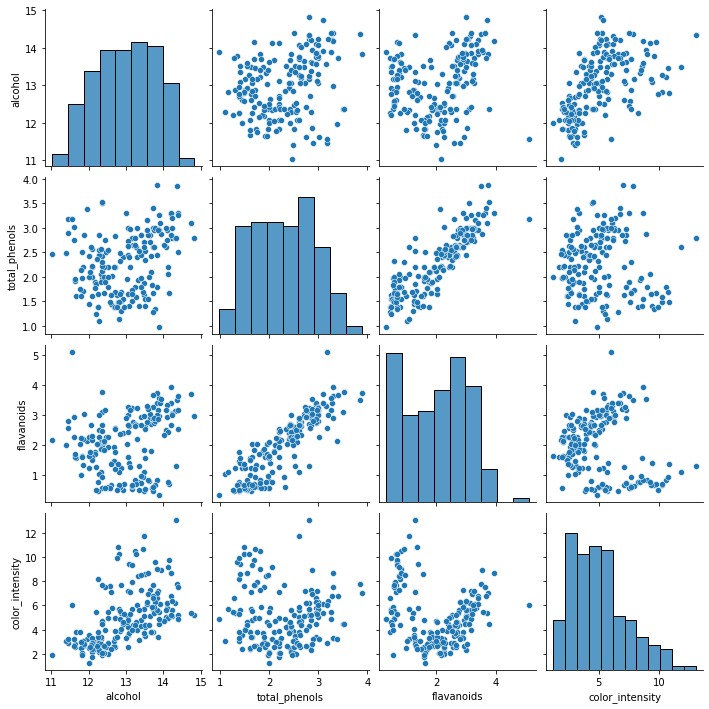

In [6]:
sns.pairplot(data=data,vars=['alcohol','total_phenols','flavanoids','color_intensity'])

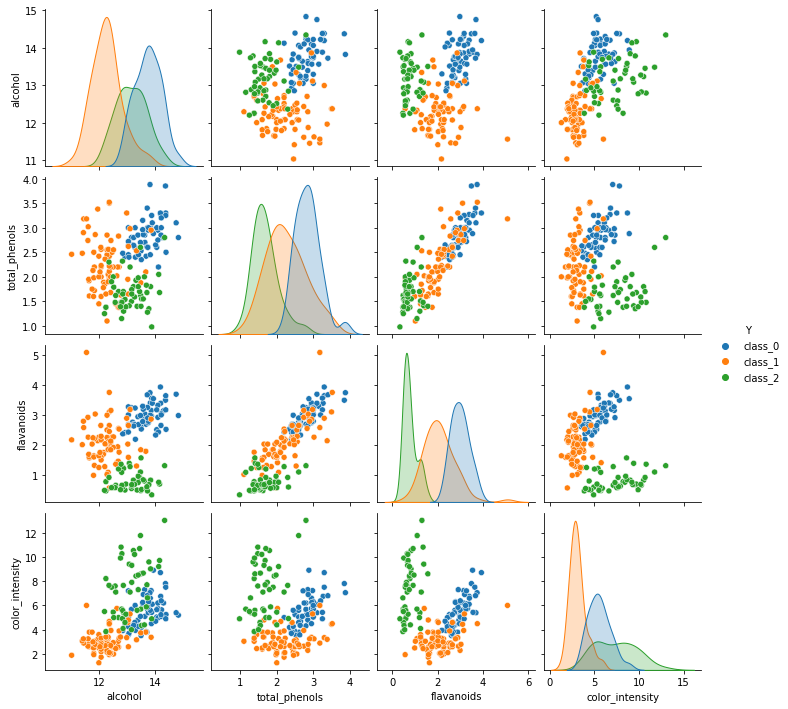

In [7]:
sns.pairplot(vars=['alcohol','total_phenols','flavanoids','color_intensity'],
             data=data,hue='Y')

Q1
분류기 생성 피처 4개만 사용 
모델 
동작
학습되는 로스를 시각화 하시오

In [8]:
X_data=data[['alcohol','total_phenols','flavanoids','color_intensity']].values
Y_data=w_data.target
from tensorflow.keras.utils import to_categorical
Y_data=to_categorical(Y_data)

In [9]:
len(X_data),len(Y_data)

(178, 178)

In [10]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,random_state=1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
m=Sequential()
m.add(Dense(3, input_dim=4,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy'
          ,metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=200,batch_size=1,validation_data=(tt_x,tt_y))

Epoch 1/200
133/133 [==============================] - 1s 2ms/step - loss: 3.6293 - accuracy: 0.3083 - val_loss: 2.3915 - val_accuracy: 0.4000
Epoch 2/200
133/133 [==============================] - 0s 846us/step - loss: 2.2474 - accuracy: 0.2857 - val_loss: 1.8462 - val_accuracy: 0.2222
Epoch 3/200
133/133 [==============================] - 0s 1ms/step - loss: 1.8835 - accuracy: 0.2105 - val_loss: 1.6796 - val_accuracy: 0.1778
Epoch 4/200
133/133 [==============================] - 0s 793us/step - loss: 1.7119 - accuracy: 0.2256 - val_loss: 1.5834 - val_accuracy: 0.2000
Epoch 5/200
133/133 [==============================] - 0s 710us/step - loss: 1.6012 - accuracy: 0.2406 - val_loss: 1.4917 - val_accuracy: 0.2222
Epoch 6/200
133/133 [==============================] - 0s 801us/step - loss: 1.4920 - accuracy: 0.2632 - val_loss: 1.4076 - val_accuracy: 0.2222
Epoch 7/200
133/133 [==============================] - 0s 831us/step - loss: 1.4023 - accuracy: 0.2782 - val_loss: 1.3416 - val_accura

133/133 [==============================] - 0s 786us/step - loss: 0.3943 - accuracy: 0.8346 - val_loss: 0.3556 - val_accuracy: 0.9778
Epoch 58/200
133/133 [==============================] - 0s 748us/step - loss: 0.3914 - accuracy: 0.8421 - val_loss: 0.3514 - val_accuracy: 0.9333
Epoch 59/200
133/133 [==============================] - 0s 783us/step - loss: 0.3914 - accuracy: 0.8647 - val_loss: 0.3530 - val_accuracy: 0.9333
Epoch 60/200
133/133 [==============================] - 0s 841us/step - loss: 0.3852 - accuracy: 0.8496 - val_loss: 0.3487 - val_accuracy: 0.9333
Epoch 61/200
133/133 [==============================] - 0s 763us/step - loss: 0.3832 - accuracy: 0.8647 - val_loss: 0.3415 - val_accuracy: 0.9556
Epoch 62/200
133/133 [==============================] - 0s 846us/step - loss: 0.3781 - accuracy: 0.8872 - val_loss: 0.3446 - val_accuracy: 0.9333
Epoch 63/200
133/133 [==============================] - 0s 635us/step - loss: 0.3767 - accuracy: 0.8496 - val_loss: 0.3345 - val_accuracy

133/133 [==============================] - 0s 727us/step - loss: 0.3328 - accuracy: 0.8571 - val_loss: 0.2536 - val_accuracy: 0.9556
Epoch 114/200
133/133 [==============================] - 0s 665us/step - loss: 0.3300 - accuracy: 0.8571 - val_loss: 0.2519 - val_accuracy: 0.9556
Epoch 115/200
133/133 [==============================] - 0s 710us/step - loss: 0.3280 - accuracy: 0.8722 - val_loss: 0.2525 - val_accuracy: 0.9111
Epoch 116/200
133/133 [==============================] - 0s 756us/step - loss: 0.3259 - accuracy: 0.8496 - val_loss: 0.2522 - val_accuracy: 0.9556
Epoch 117/200
133/133 [==============================] - 0s 710us/step - loss: 0.3310 - accuracy: 0.8571 - val_loss: 0.2499 - val_accuracy: 0.9556
Epoch 118/200
133/133 [==============================] - 0s 574us/step - loss: 0.3270 - accuracy: 0.8797 - val_loss: 0.2507 - val_accuracy: 0.9556
Epoch 119/200
133/133 [==============================] - 0s 574us/step - loss: 0.3257 - accuracy: 0.8797 - val_loss: 0.2486 - val_ac

133/133 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8496 - val_loss: 0.2286 - val_accuracy: 0.9556
Epoch 170/200
133/133 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8571 - val_loss: 0.2269 - val_accuracy: 0.9556
Epoch 171/200
133/133 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8571 - val_loss: 0.2277 - val_accuracy: 0.9556
Epoch 172/200
133/133 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8722 - val_loss: 0.2275 - val_accuracy: 0.9556
Epoch 173/200
133/133 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8571 - val_loss: 0.2263 - val_accuracy: 0.9556
Epoch 174/200
133/133 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8647 - val_loss: 0.2253 - val_accuracy: 0.9333
Epoch 175/200
133/133 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8496 - val_loss: 0.2258 - val_accuracy: 0.9556

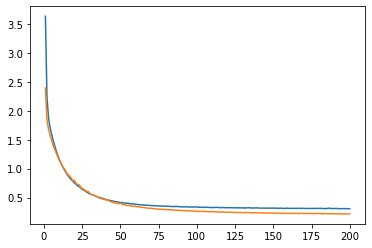

In [13]:
import matplotlib.pyplot as plt
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])